In [ ]:
pip install keras-tuner

In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam 
from kerastuner import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [ ]:
pip install visualkeras

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import visualkeras

from sklearn.model_selection import train_test_split

In [12]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [14]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
fid = drive.ListFile({'q':"title='BrainTumor.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('BrainTumor.zip')

In [16]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [17]:
!unzip BrainTumor.zip

Archive:  BrainTumor.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflating: Testing/gliom

In [18]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2


from sklearn.model_selection import train_test_split

In [19]:
data_dir = ('/content/NEw/Training/')
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

In [20]:
train_img = []
train_labels = []

test_img = []
test_labels = []

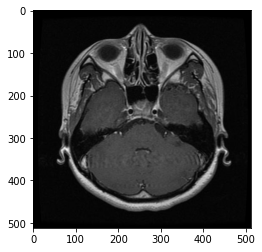

In [21]:
plt.imshow(img_array)

In [22]:
img_array.shape

(512, 512, 3)

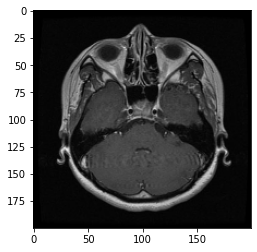

In [23]:
new_size = 200
new_array = cv2.resize(img_array,(new_size,new_size))    
plt.imshow(new_array,cmap = "gray")

In [24]:
import tensorflow as tf

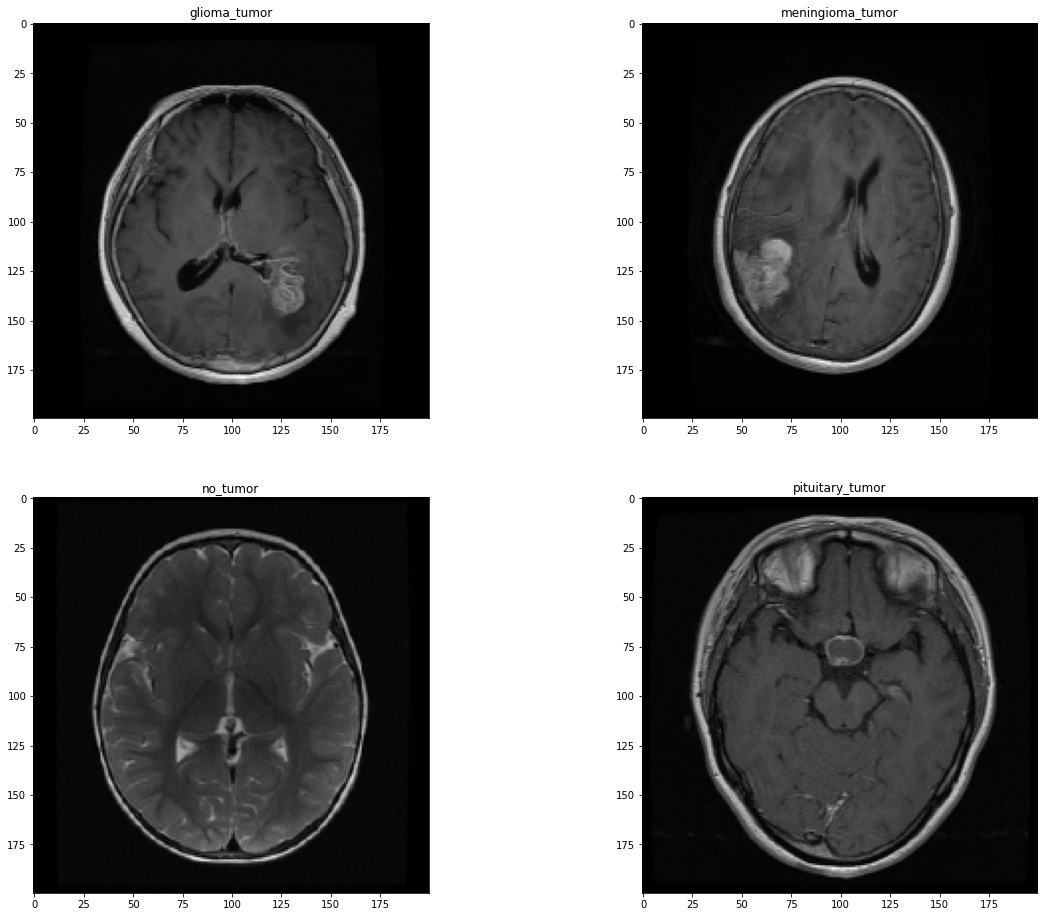

In [25]:
plt.figure(figsize=(20, 16))

fileNames = ['glioma_tumor/gg (10).jpg', 'meningioma_tumor/m (108).jpg', 'no_tumor/image (16).jpg', 'pituitary_tumor/p (12).jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + fileNames[i])
    img = cv2.resize(img, (new_size, new_size))
    plt.imshow(img)
    plt.title(categories[i])

In [26]:
x_train=[]
y_train=[]

for i in categories:
    train_path = os.path.join(data_dir,i)
    for j in os.listdir(train_path):
        img = cv2.imread(os.path.join(train_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_train.append(img)
        y_train.append(i)

In [27]:
x_train=np.array(x_train)
x_train=x_train/255.0
x_train = x_train.reshape(-1,new_size,new_size,1)
x_train.shape

(2870, 200, 200, 1)

In [29]:
y_train = np.array(y_train)
y_train.shape

(2870,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


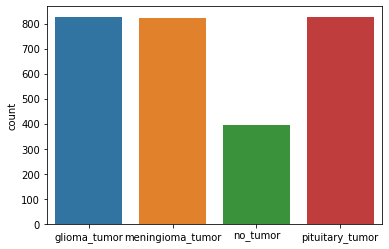

In [30]:
sns.countplot(y_train)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [32]:
y_train_new = []
for i in y_train:
    y_train_new.append(categories.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_val_new = []
for i in y_val:
    y_val_new.append(categories.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [33]:
X_train.shape, y_train.shape

((2296, 200, 200, 1), (2296, 4))

In [34]:
X_val.shape, y_val.shape

((574, 200, 200, 1), (574, 4))

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [54]:
epochs = 25
batch_size = 32

In [55]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range = 0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False)  

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [57]:
model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=7, padding= 'Same', activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=128, kernel_size=7, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=128, kernel_size=7, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=256, kernel_size=7, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=256, kernel_size=7, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=512, kernel_size=7, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Flatten())
model1.add(Dense(1024, activation = "relu"))
model1.add(Dropout(0.2))

model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.2))

model1.add(Dense(4, activation = "softmax"))
optimizer = SGD(lr=0.01)

model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [58]:
history= model1.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs, validation_data = (X_val,y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
72/72 [==============================] - 8s 91ms/step - loss: 1.0917 - accuracy: 0.6193 - val_loss: 1.8385 - val_accuracy: 0.2718
Epoch 2/25
72/72 [==============================] - 6s 85ms/step - loss: 0.6277 - accuracy: 0.7356 - val_loss: 1.7314 - val_accuracy: 0.2718
Epoch 3/25
72/72 [==============================] - 6s 85ms/step - loss: 0.4990 - accuracy: 0.7857 - val_loss: 2.3947 - val_accuracy: 0.2770
Epoch 4/25
72/72 [==============================] - 6s 85ms/step - loss: 0.3700 - accuracy: 0.8537 - val_loss: 2.2300 - val_accuracy: 0.3345
Epoch 5/25
72/72 [==============================] - 6s 85ms/step - loss: 0.3028 - accuracy: 0.8780 - val_loss: 1.9173 - val_accuracy: 0.4321
Epoch 6/25
72/72 [==============================] - 6s 85ms/step - loss: 0.2465 - accuracy: 0.9090 - val_loss: 1.1897 - val_accuracy: 0.5662
Epoch 7/25
72/72 [==============================] - 6s 85ms/step - loss: 0.1705 - accuracy: 0.9342 - val_loss: 0.6453 - val_accuracy: 0.7300
Epoch 8/25
72

In [82]:
from keras.models import load_model

model1.save('my_model.h5')

In [83]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


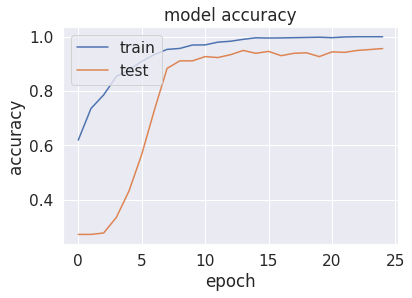

In [84]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

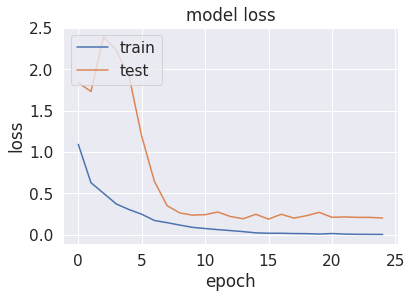

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 64)      3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                      

In [87]:
from keras.utils.vis_utils import plot_model

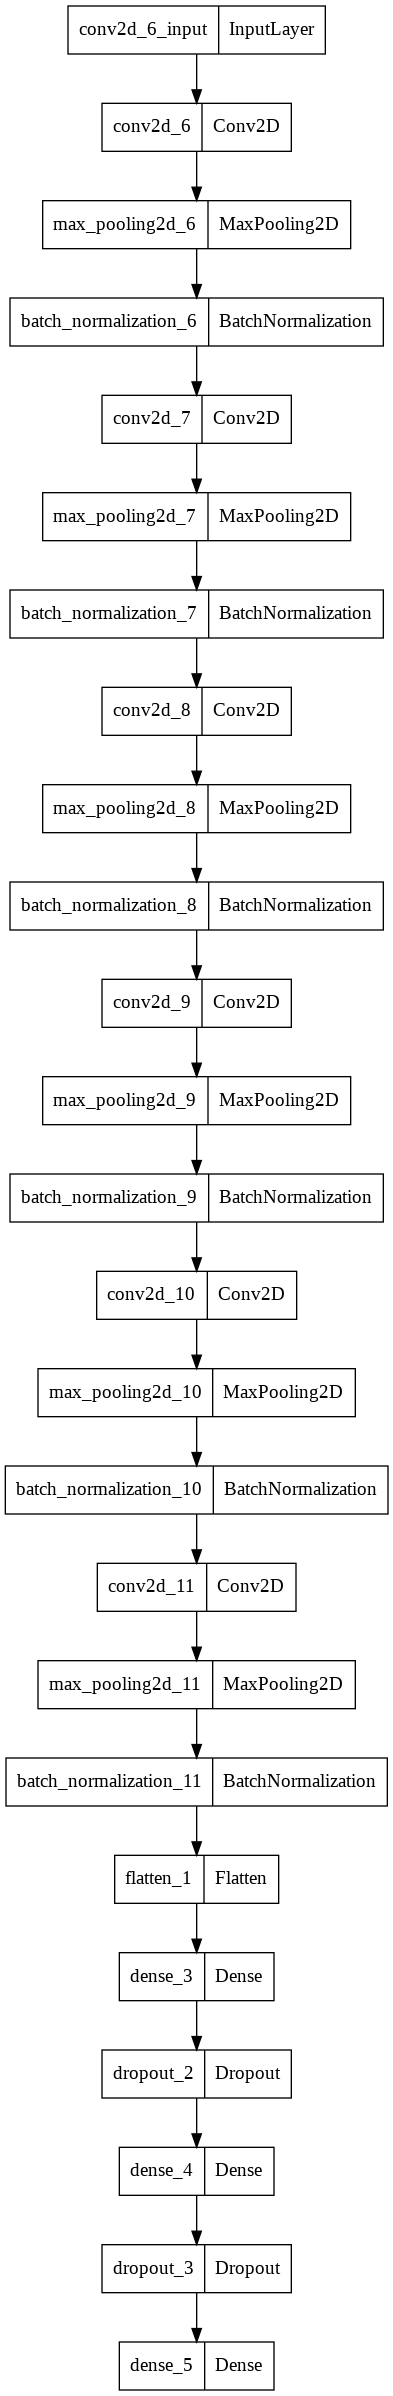

In [88]:
plot_model(model1)

In [89]:
model_x = load_model('my_model.h5')

In [90]:
X_val.shape, y_val.shape

((574, 200, 200, 1), (574, 4))

In [91]:
y_pred = model1.predict(X_val)
print(y_pred[:5])

[[4.5967600e-01 5.4027748e-01 2.2432958e-05 2.4102012e-05]
 [4.5437168e-06 5.6617540e-07 3.5690122e-05 9.9995923e-01]
 [2.2168422e-02 9.7773117e-01 3.1571253e-05 6.8784560e-05]
 [9.9714065e-01 2.8091597e-03 4.5116292e-05 5.0510575e-06]
 [2.7020538e-01 6.6845049e-03 3.9710123e-03 7.1913910e-01]]


In [92]:
class_pred = [np.argmax(i) for i in y_pred]
print(class_pred[:5])

[1, 3, 1, 0, 3]


In [93]:
#Printing the original classes for the 5 first records:

val_labels =[np.argmax(i) for i in y_val]
print(val_labels[:5])

[0, 3, 0, 0, 3]


In [94]:
from sklearn.metrics import classification_report

report = classification_report(val_labels, class_pred)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       179
           1       0.94      0.93      0.94       169
           2       0.95      0.90      0.93        70
           3       0.97      0.99      0.98       156

    accuracy                           0.96       574
   macro avg       0.96      0.95      0.95       574
weighted avg       0.96      0.96      0.96       574



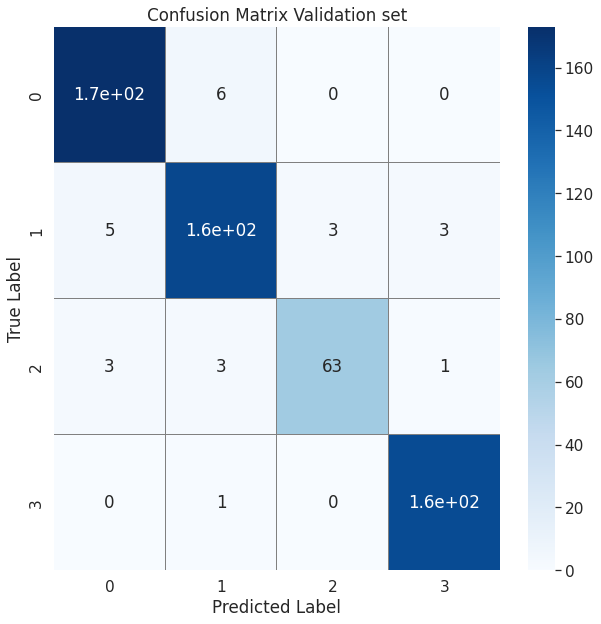

In [95]:
from sklearn.metrics import confusion_matrix

f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx = confusion_matrix(val_labels, class_pred)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Validation set")
plt.show()

Performance on testing dataset:

In [96]:
data_dir_test=(r'/content/NEw/Testing/')

In [97]:
x_test=[]
y_test=[]

for i in categories:
    test_path = os.path.join(data_dir_test,i)
    for j in os.listdir(test_path):
        img = cv2.imread(os.path.join(test_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_test.append(img)
        y_test.append(i)

In [98]:
x_test=np.array(x_test)
x_test=x_test/255.0
x_test=x_test.reshape(-1,new_size,new_size,1)
x_test.shape

(394, 200, 200, 1)

In [99]:
y_test=np.array(y_test)
y_test.shape

(394,)

In [100]:
y_test_new = []
for i in y_test:
    y_test_new.append(categories.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [101]:
predicted_labels = model1.predict(x_test)
print(predicted_labels[:5])

[[1.0250043e-04 6.2245363e-01 3.4702471e-01 3.0419234e-02]
 [4.0532902e-07 9.9971312e-01 2.8647081e-04 4.0039691e-08]
 [3.9135304e-01 1.1277809e-01 4.9497449e-01 8.9438265e-04]
 [9.8961732e-07 4.5127568e-01 5.4872310e-01 1.9761735e-07]
 [7.3450428e-07 2.6121354e-03 9.9738675e-01 3.8161042e-07]]


In [102]:
predicted_labels = [np.argmax(i) for i in predicted_labels]
print(predicted_labels[:5])

[1, 1, 2, 2, 2]


In [103]:
original_labels =[np.argmax(i) for i in y_test]
print(original_labels[:5])

[0, 0, 0, 0, 0]


In [104]:
report2 = classification_report(original_labels, predicted_labels)

print(report2)

              precision    recall  f1-score   support

           0       0.86      0.18      0.30       100
           1       0.67      0.96      0.79       115
           2       0.70      0.96      0.81       105
           3       0.89      0.80      0.84        74

    accuracy                           0.73       394
   macro avg       0.78      0.72      0.69       394
weighted avg       0.77      0.73      0.68       394



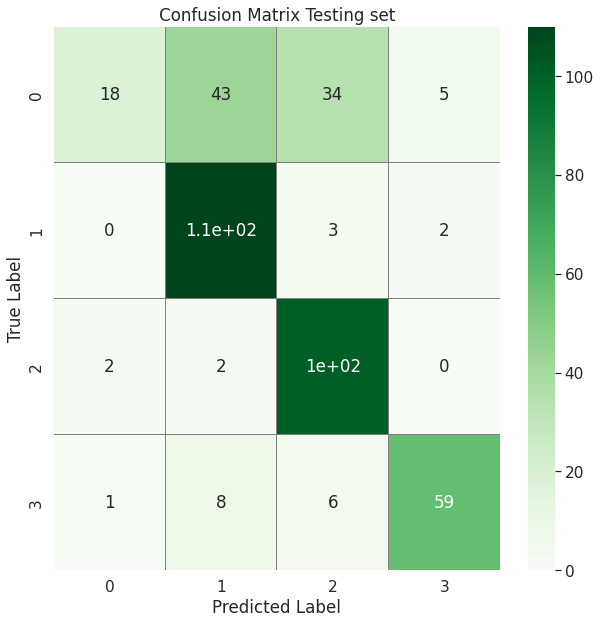

In [105]:
f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx2 = confusion_matrix(original_labels, predicted_labels)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx2, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Testing set")
plt.show()
